## About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem Statement
The objective of this project is to develop a predictive algorithm that estimates the probability of loan approval for applicants based on various demographic, educational, and financial characteristics. By leveraging this predictive model, the bank aims to streamline the loan approval process and accurately determine whether an applicant is likely to default on the loan in the future. The model will help the bank target eligible customer segments, reduce manual workload, and enhance decision-making efficiency in the loan approval process.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_dt.csv')

In [3]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


## Dataset Description:
- Loan_ID 	--  Unique Loan ID
- Gender	-- Male/ Female
- Married	-- Applicant married (Y/N)
- Dependents -- Number of dependents
- Education	-- Applicant Education (Graduate/ Under Graduate)
- Self_Employed --	Self employed (Y/N)
- ApplicantIncome -- Applicant income
- CoapplicantIncome --	Coapplicant income
- LoanAmount --	Loan amount in thousands
- Loan_Amount_Term --	Term of loan in months
- Credit_History -- 	credit history meets guidelines
- Property_Area	-- Urban/ Semi Urban/ Rural
- Loan_Status --	Loan approved (Y/N)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Observations:
- We can see there are total 13 columns including target variable, all of them are self explanatory.
- We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Let us understand the relationship between Y and Xi's

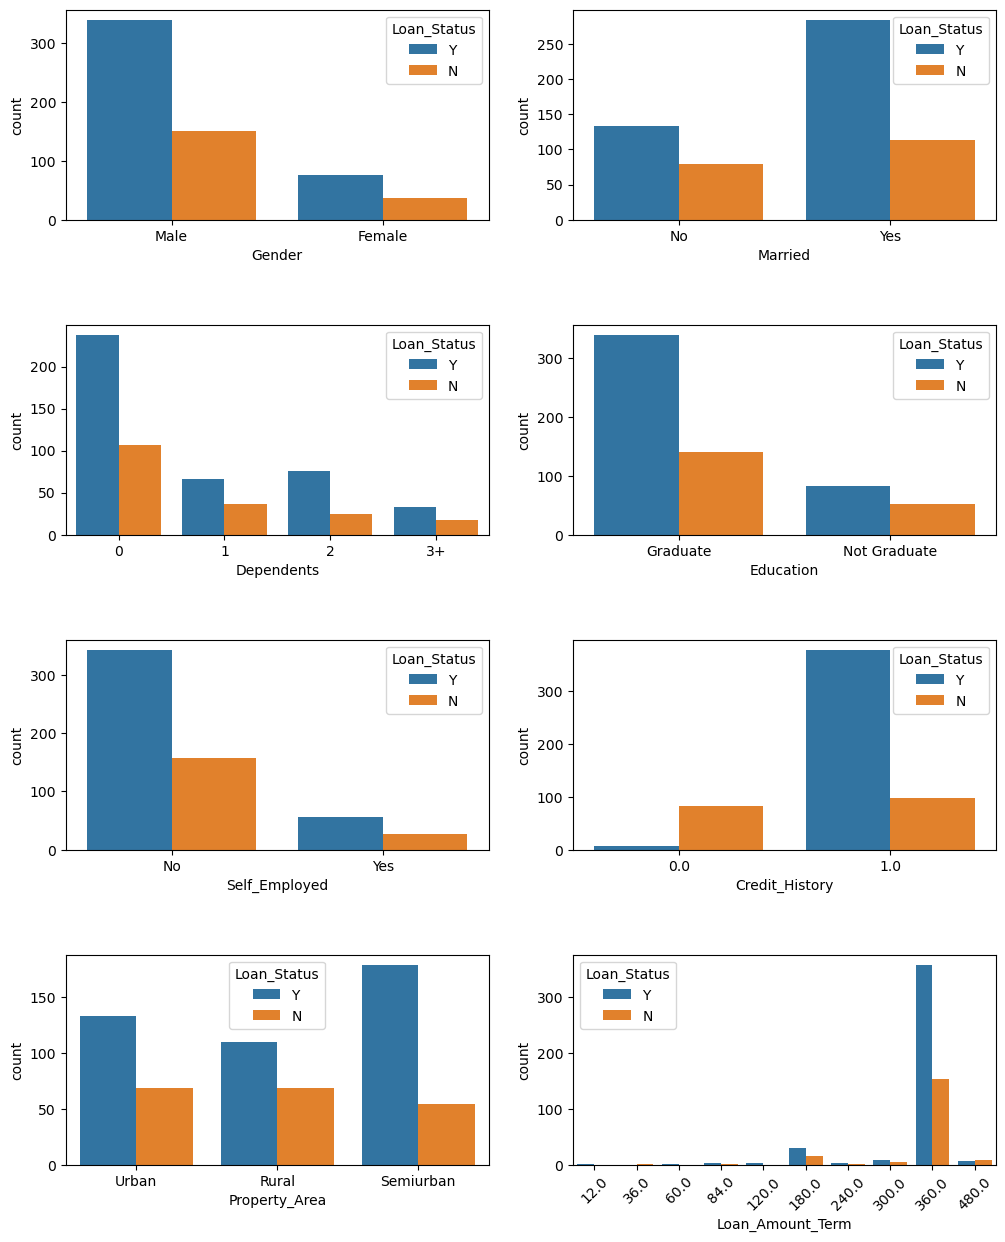

In [6]:
column = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area','Loan_Amount_Term']

fig,axes = plt.subplots(nrows=4,ncols=2,figsize =(12,15))

for idx, feature in enumerate(column):
    ax = axes[idx//2,idx%2]
    sns.countplot(x=feature, data = df, hue= 'Loan_Status', ax = ax)
    plt.xticks(rotation = 45)
plt.subplots_adjust(hspace=0.5)

plt.show()

In [7]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

## Plots above convey following things about the dataset:
- Loan Approval Status: About 2/3rd of applicants have been granted loan.
- Gender: There are more Men than Women (approx. 3x)
- Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
- Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
- Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
- Employment: 5/6th of population is not self employed.
- Property Area: More applicants from Semi-urban and also likely to be granted loans.
- Applicant with credit history are far more likely to be accepted.
- Loan Amount Term: Majority of the loans taken are for 360 Months (30 years)

In [8]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

## Missing value imputation

In [9]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- There are missing values in `Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History` features.
- For numerical variables: imputation using mean or median

- For categorical variables: imputation using mode

In [10]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [11]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

- It can be seen that in loan amount term variable, the value of `360` is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [12]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

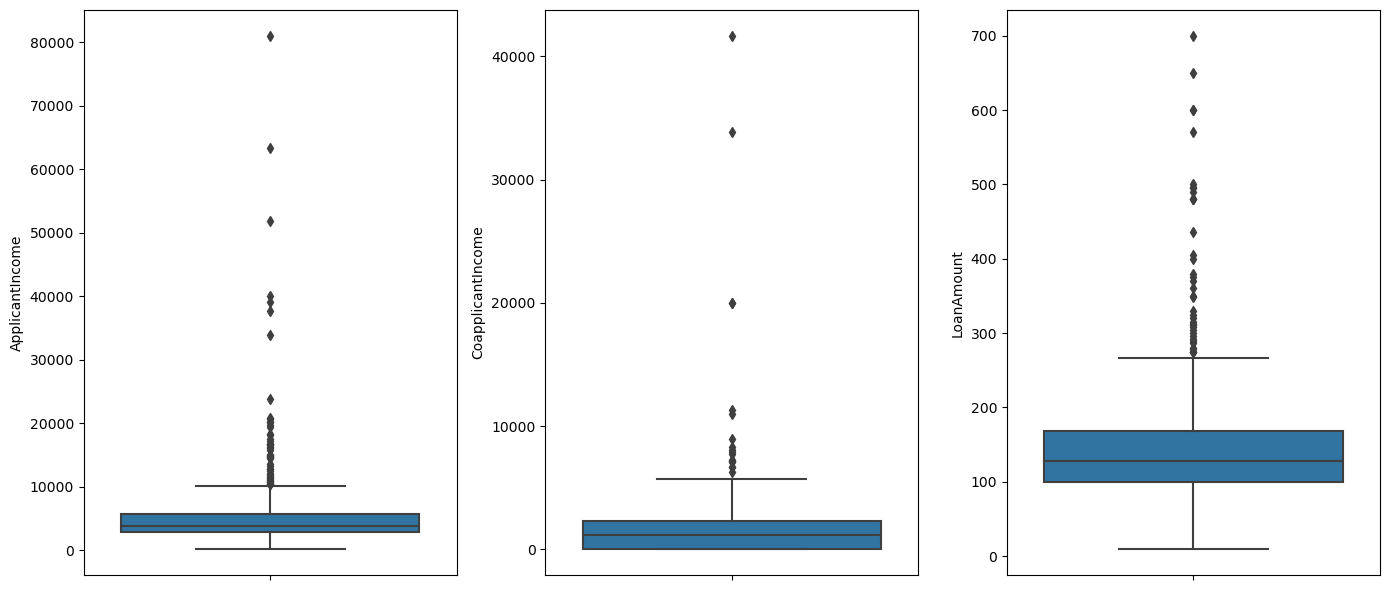

In [13]:
col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize = [14,6])
for idx, feature in enumerate(col):
    sns.boxplot(y =feature, data = df, ax =axes[idx] )
plt.tight_layout()
plt.show()


- We will use median to fill the null values as we see that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.
- Since we are doing standardization process, we are choosing not to eliminate outliers from the dataset.

In [14]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

## Now lets check whether all the missing values are filled in the dataset.



In [15]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

-- As we can see the missing null value has been filled. 

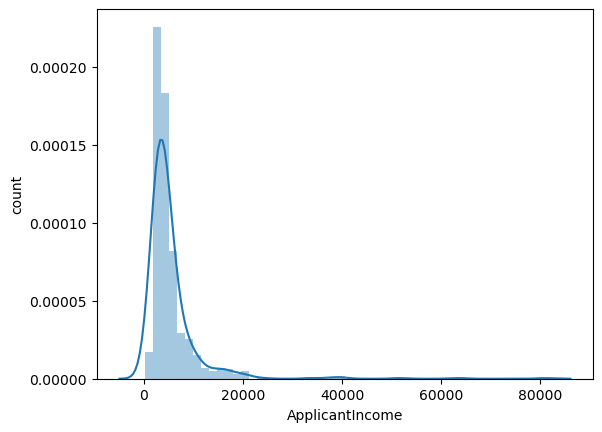

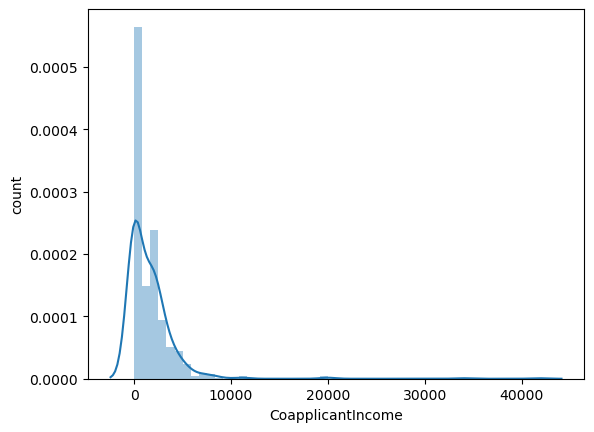

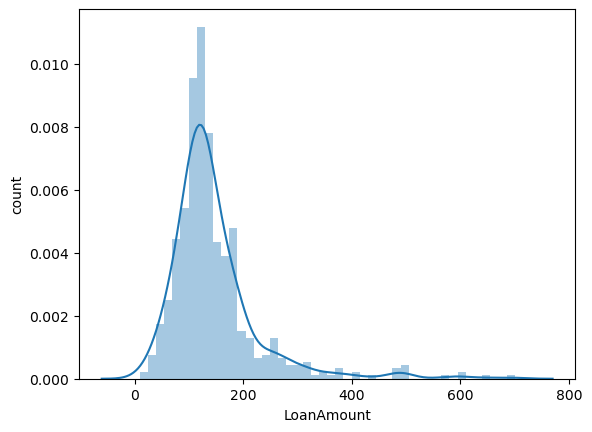

In [16]:
import warnings


normal_dist = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

with warnings.catch_warnings():
    warnings.simplefilter("ignore") 
    for i in normal_dist:
        sns.distplot(x= df[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

## Interpretation from the plot
-- All the three plots are skewed towards right

## Correlation Matrix

In [17]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

numerical_df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


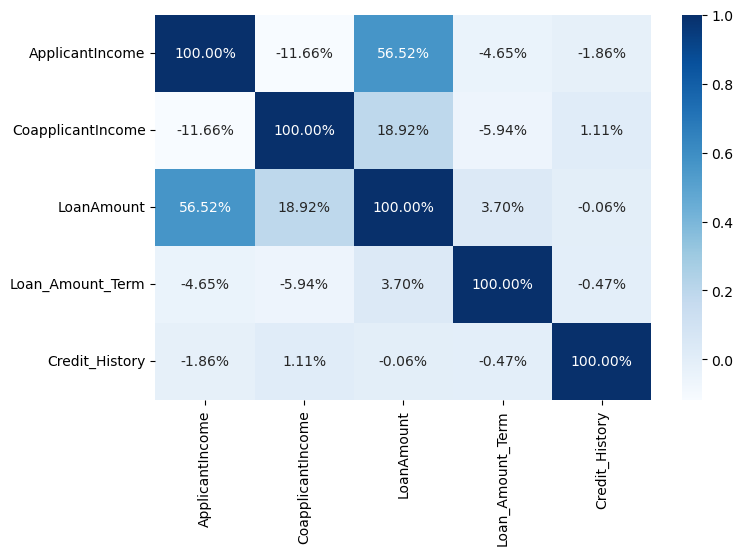

In [18]:
plt.figure(figsize=(8,5))
sns.heatmap(numerical_df.corr(), annot=True, cmap='Blues',fmt='.2%')
plt.show()

-- Key takeaway: `Applicant income` seems to be `moderately` correlated with the `loan amount`

In [19]:
df.drop(columns='Loan_ID', inplace=True)
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


## Encoding Categorical Features

In [20]:
bool_columns = df.select_dtypes(include=bool).columns
df[bool_columns] = df[bool_columns].astype(str)

In [21]:
df_encoded = pd.get_dummies(df,drop_first=True)

In [22]:
df_encoded = df_encoded.astype(int)

In [23]:
df_encoded.head(2).T

,0,1
ApplicantIncome,5849,4583
CoapplicantIncome,0,1508
LoanAmount,128,128
Loan_Amount_Term,360,360
Credit_History,1,1
Gender_Male,1,1
Married_Yes,0,1
Dependents_1,0,1
Dependents_2,0,0
Dependents_3+,0,0


## Split Target and Features Variable

In [24]:
X = df_encoded.iloc[:,:-1]

In [25]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0,128,360,1,1,0,0,0,0,0,0,0,1
1,4583,1508,128,360,1,1,1,1,0,0,0,0,0,0
2,3000,0,66,360,1,1,1,0,0,0,0,1,0,1
3,2583,2358,120,360,1,1,1,0,0,0,1,0,0,1
4,6000,0,141,360,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0,71,360,1,0,0,0,0,0,0,0,0,0
610,4106,0,40,180,1,1,1,0,0,1,0,0,0,0
611,8072,240,253,360,1,1,1,1,0,0,0,0,0,1
612,7583,0,187,360,1,1,1,0,1,0,0,0,0,1


In [26]:
y = df_encoded['Loan_Status_Y']

In [27]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: int32

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state= 2)

## Standardizing the feature

-- Standardizing the features so that the samples will have the same mean and standard deviation

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [30]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Model Building

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
logistic_model = LogisticRegression()

In [33]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [34]:
pred_logistic = logistic_model.predict(X_test)

In [35]:
Accuracy_score_logistic =  accuracy_score(y_test,pred_logistic) * 100

In [36]:
Accuracy_score_logistic

77.23577235772358

In [37]:
classification_logistic = classification_report(y_test,pred_logistic)

In [38]:
print(classification_logistic)

              precision    recall  f1-score   support

           0       0.87      0.33      0.48        39
           1       0.76      0.98      0.85        84

    accuracy                           0.77       123
   macro avg       0.81      0.65      0.67       123
weighted avg       0.79      0.77      0.74       123



In [39]:
cm_logistic = confusion_matrix(y_test,pred_logistic)

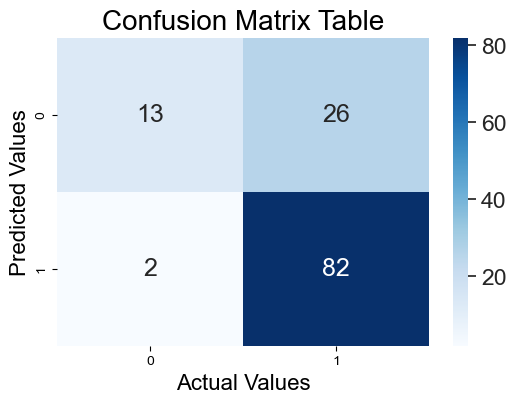

In [40]:
plt.subplots(figsize = (6,4))
sns.set(font_scale=1.5)
sns.heatmap(cm_logistic, annot=True, cmap='Blues')
plt.title("Confusion Matrix Table", fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)

plt.show()

## Inference from Logistic model
- The model's accuracy is 77.23%. This means that the model correctly predicted the loan status for 77.23% of the cases in the dataset. Accuracy is the ratio of correctly predicted observations to the total observations
- There are 28 misclassified instances. Misclassifications include both false positives (predicting loan approval when it was not) and false negatives (predicting loan rejection when it was actually approved).

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
decision_tree = DecisionTreeClassifier()

In [43]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
pred_decision = decision_tree.predict(X_test)

In [45]:
Accuracy_score_Decision = accuracy_score(y_test,pred_decision) * 100

In [46]:
Accuracy_score_Decision

73.17073170731707

In [47]:
classification_decision = classification_report(y_test,pred_decision)

In [48]:
print(classification_decision)

              precision    recall  f1-score   support

           0       0.57      0.62      0.59        39
           1       0.81      0.79      0.80        84

    accuracy                           0.73       123
   macro avg       0.69      0.70      0.70       123
weighted avg       0.74      0.73      0.73       123



In [49]:
cm_decision = confusion_matrix(y_test,pred_decision)

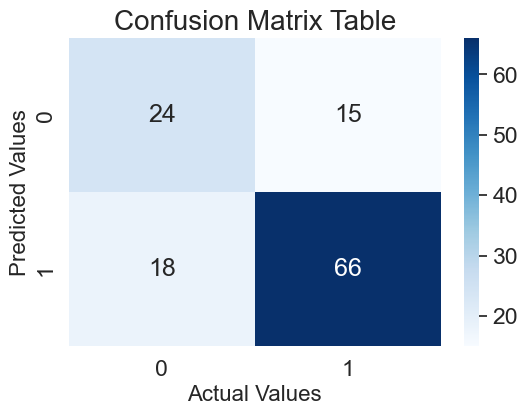

In [50]:
plt.subplots(figsize = (6,4))
sns.set(font_scale=1.5)
sns.heatmap(cm_decision, annot=True, cmap='Blues')
plt.title("Confusion Matrix Table", fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)

plt.show()

## Inference from Decision Tree model
- Our predictions are almost 73.17% accurate, i.e. we have identified 73.17% of the loan status correctly for our Decision tree model. Let check the robustness of the model by running the K Fold Cross validation.

## K- Fold Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
cv_scores = cross_val_score(decision_tree, X, y, cv =5, scoring='accuracy')

In [53]:
cv_scores * 100

array([71.54471545, 67.4796748 , 67.4796748 , 76.42276423, 69.67213115])

In [54]:
cv_scores.mean()

0.7051979208316673

In [55]:
print('Validation Accuracy:', cv_scores.mean() * 100)

Validation Accuracy: 70.51979208316673


## "The accuracy achieved through K-fold cross-validation is 70.51%."

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
random_forest = RandomForestClassifier()

In [58]:
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
pred_random = random_forest.predict(X_test)

In [60]:
Accuracy_score_random_forest = accuracy_score(y_test,pred_random) *100

In [61]:
Accuracy_score_random_forest

74.79674796747967

In [62]:
classification_random = classification_report(y_test,pred_random)

In [63]:
print(classification_random)

              precision    recall  f1-score   support

           0       0.70      0.36      0.47        39
           1       0.76      0.93      0.83        84

    accuracy                           0.75       123
   macro avg       0.73      0.64      0.65       123
weighted avg       0.74      0.75      0.72       123



In [64]:
cm_random = confusion_matrix(y_test,pred_random)

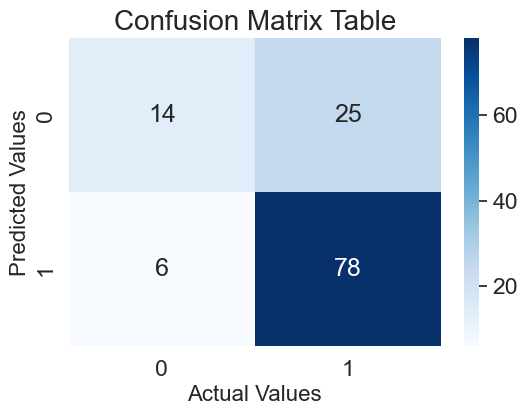

In [65]:
plt.subplots(figsize = (6,4))
sns.set(font_scale=1.5)
sns.heatmap(cm_random, annot=True, cmap='Blues')
plt.title("Confusion Matrix Table", fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)

plt.show()

## Inference from Random Forest
- Our predictions are almost 74.79% accurate, i.e. we have identified 74.79% of the loan status correctly for our Random Forest model.

## Random Forest with Grid Search
- We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters


In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
random_hpt = RandomForestClassifier()

In [68]:
## Define the hyperparameters
hpt_grid = {
    'max_depth':[None,3,5,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4,6],
    'n_estimators': list(range(1,200,20))
}

In [69]:
grid_search = GridSearchCV(estimator=random_hpt,param_grid=hpt_grid)

In [70]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [71]:
## Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 81}


In [72]:
grid_forest_model = RandomForestClassifier(n_estimators=61, max_depth=None, min_samples_leaf=2, min_samples_split=10)

In [73]:
grid_forest_model.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=61)

In [74]:
pred_grid_forest = grid_forest_model.predict(X_test)

In [75]:
Accuracy_grid_forest = accuracy_score(y_test, pred_grid_forest) * 100

In [76]:
Accuracy_grid_forest

75.60975609756098

## "The accuracy obtained after hyperparameter tuning is 75.60%."

In [77]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest','Random Forest with Grid Search'],
    'Accuracy': [Accuracy_score_logistic, Accuracy_score_Decision,Accuracy_score_random_forest, Accuracy_grid_forest]})
models.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
0,Logistic Regression,77.235772
3,Random Forest with Grid Search,75.609756
2,Random Forest,74.796748
1,Decision Tree,73.170732


 ## From the above comparision of set, we can see `Logistic Regression model` is performing better than other models.